In [5]:
import mlx.core as mx
from mlx_graphs.sampler.neighbor_sampler import sample_nodes
import numpy as np

In [6]:
edge_list = np.array([[0,0,1,1,2,3,4,2,3,3,4,5,6,7],
                    [2,3,3,4,5,6,7,0,0,1,1,2,3,4]])

sample_nodes(edge_list=edge_list, num_neighbors=2, batch_size=1)

[(0, 2), (0, 3)]

In [24]:
from typing import Any, Dict, Iterable, List, Literal, Optional, Tuple, Union
from mlx_graphs.data import GraphData

def to_networkx(
    data: GraphData,
    remove_self_loops: bool = False,
) -> Any:
    r"""Converts a :class:`mlx_graphs.data.GraphData` instance to a
    :obj:`networkx.Graph` if :attr:`to_undirected` is set to :obj:`True`, or
    a directed :obj:`networkx.DiGraph` otherwise.

    Args:
        data (mlx_graphs.data.GraphData or torch_geometric.data.HeteroData): A graph data object.
        remove_self_loops (bool, optional): If set to :obj:`True`, will not
            include self-loops in the resulting graph. (default: :obj:`False`)

    Examples:
        >>> edge_index = mx.array([
        ...     [0, 1, 1, 2, 2, 3],
        ...     [1, 0, 2, 1, 3, 2],
        ... ])
        >>> data = GraphData(edge_index=edge_index, num_nodes=4)
        >>> to_networkx(data)
        <networkx.classes.digraph.DiGraph at 0x2713fdb40d0>

    """
    import networkx as nx

    G = nx.MultiDiGraph() if to_multi else nx.DiGraph()

    def to_networkx_value(value: Any) -> Any:
        return value.tolist() if isinstance(value, mx.array) else value

    for i, _ in enumerate(data.node_features):

        G.add_node(i)

    for v,w in data.edge_index.T.tolist():
        if remove_self_loops and v == w :
            continue

            G.add_edge(v, w)

    return G

In [11]:
edge_index = mx.array([[0, 1, 1, 2, 2, 3],[1, 0, 2, 1, 3, 2]])
node_features = mx.array([[1],[1],[1],[1]])
data = GraphData(node_features=node_features, edge_index=edge_index)

In [28]:
G = to_networkx(data=data)

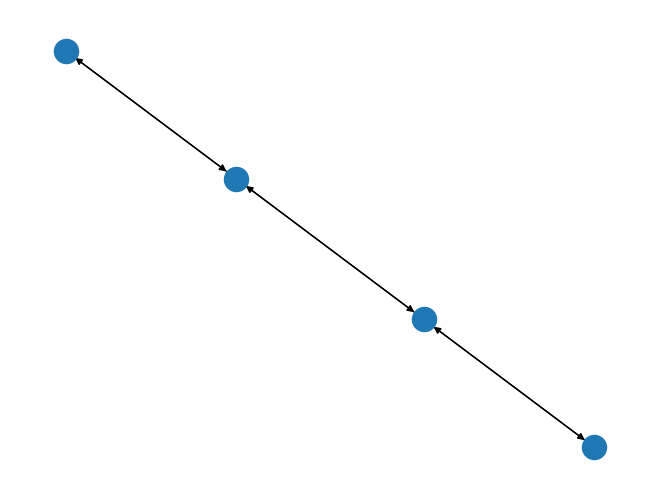

In [31]:
import networkx as nx
import matplotlib.pyplot as plt
nx.draw(G)